In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv"
df=pd.read_csv(path)
df

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


# 1. Bussiness Understanding

Melvi Aprilia, the regional sales manager she is back for more help. Business is booming, her sales team is signing up thousands of new clients, and she wants to be sure the company will be able to meet this new level of demand. She was so pleased with our assistance in finding correlations in her data, she now is hoping we can help her **do some prediction** as well. She knows that there is some correlation between the attributes in her dataset (things like temperature, insulation, and occupant ages), and she now wondering if she can use the dataset to **predict heating oil usage for new customers**. You see, these new customers haven't begun consuming heating oil yet, there are a lot of them (42,650 to be exact) and she wants to know how much oil she needs to expect to keep in stock in order to meet these new customers demand. Can she use data mining to examine household attributes and known past consumption quantities to anticipate and meet her new customers need?

Case problem : Estimasi

Judul : Penerapan Mesin Learning untuk Mengamankan Stok Level Heating Oil Menggunakan Pendekatan Analisa Prediktif

"Predictive Stock Level Heating Oil"

Jenis ML : Supervised Learning

Data Training : Valid Historikal penjualan heating oil dengan merekap form pelanggan, **insulation, temperature, avg age, home size, num of occupant**

Kemungkinan Algoritma :
1. Linear Regression
2. MLP Regression (Artificial Neural Network)


# 2. Data Understanding

As a review, our data set from Chapter 4 contains the following attributes:
- Insulation:
This is a density rating, ranging from one to ten, indicating the thickness of
each home’s insulation. A home with a density rating of one is poorly insulated, while a home with a density of ten has excellent insulation.

- Temperature:
This is the average outdoor ambient temperature at each home for the
most recent year, measure in degree Fahrenheit.

- Heating_Oil:
This is the total number of units of heating oil purchased by the owner of
each home in the most recent year.

- Num_Occupants: This is the total number of occupants living in each home.

- Avg_Age: This is the average age of those occupants.

- Home_Size: This is a rating, on a scale of one to eight, of the home’s overall size. The higher the number, the larger the home

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


Note : Syarat dari penyelesaian problem estimasi adalah tidak ada variabel kategorik, sehingga untuk kasus ini tidak perlu melakukan konversi data dan tidak perlu handling missing value karena tidak terdeteksi missing value
(skip data preparation)

# 3. Pemodelan Data

## a. Linear Regression

<Axes: title={'center': 'analisis Pearson Correlation'}>

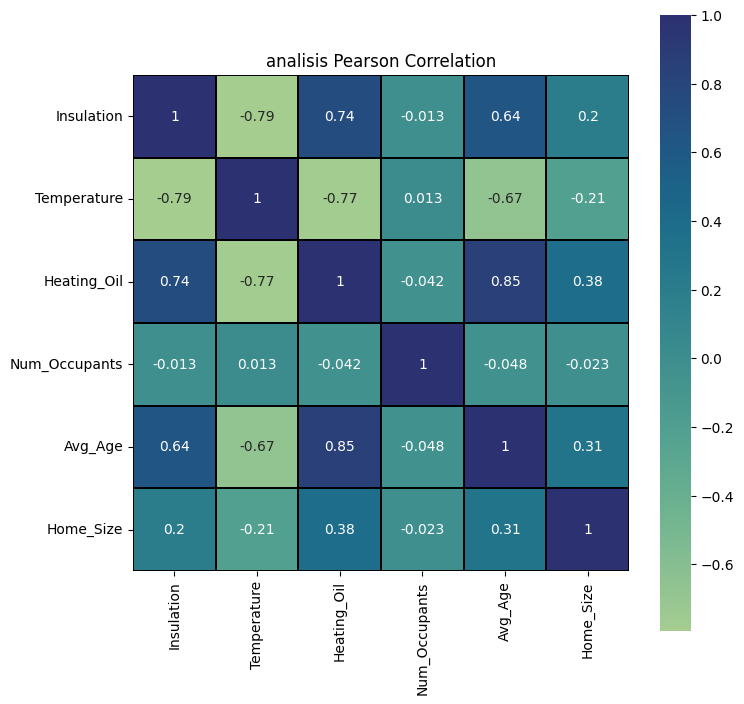

In [4]:
yfig, ax = plt.subplots(figsize= (8,8))
plt.title("analisis Pearson Correlation")
sns.heatmap(df.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap='crest', linecolor='black', annot=True)


In [5]:
#Menentukan Input Variabel
x=df[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]

#Menentukan Target variabel
y=df['Heating_Oil']

In [6]:
#untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split

# untuk Linear model
from sklearn.linear_model import LinearRegression

# untuk evaluasi model
from sklearn import metrics

In [7]:
#Split data menjadi training dan testing (70:30)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [8]:
regressor = LinearRegression()
# Train Model
model_reg = regressor.fit(x_train, y_train)

# Predict Model
y_pred_reg = model_reg.predict(x_test)


In [9]:
#Evaluasi linear regression
print('r2_score :', metrics.r2_score(y_test, y_pred_reg))

r2_score : 0.8113322126382521


In [13]:
#Function MAPE
def mape( y_true, y_pred):
  y_true, y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE :', mape(y_test, y_pred_reg))

MAPE : 7.845552048912459


**Hasil Evaluasi pada model linear regression**
Baik
R2 menunjukkan nilai 0.81 yang mana mendekati nilai 1. Artinya sebesar 81% variabel heating oil (y) dipengaruhi oleh insulation, dkk
19% sisanya dipengaruhi oleh variabel lain

##b. MLP Regressor (Artificial Neural Network)

In [18]:
from sklearn.neural_network import MLPRegressor

In [21]:
#Object MLP Regressor
mlp_reg=MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=300)

#Training Model
model_mlp=mlp_reg.fit(x_train, y_train)

#Predict Model
y_pred_mlp=model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
#Evaluasi MLP Regressor
print('r2_Score :', metrics.r2_score(y_test, y_pred_mlp))

r2_Score : 0.9220227705032455


In [24]:
print('MAPE :', mape(y_test, y_pred_mlp))

MAPE : 4.687304745880373


**Hasil Evaluasi pemodelan Neural Network (MLP Regressor)**
1. R2 = 0.922 **(Sangat baik)**
2. Mape = 4.69% artinya ketepatan model 95.31%

Maka model terbaik diantara linear regression dengan MLP Regressor adalah **MLP Regressor** dengan MAPE 5% yang artinya tingkat kegagalannya 5% dan tingkat keakuratannya 95%, R2 = 0.92

#4. Implementasi model ke data baru (Implementation Model to Machine Learning)

Model yang akan  digunakan adalah MLP Regressor (ANN = Artificial Neural Network)

In [15]:
path1="/content/drive/MyDrive/DataSource/heatingOilNewust.csv"
df1=pd.read_csv(path1)
df1=pd.DataFrame(df1)
df1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


 Data Preparation



In [17]:
#1. Select input variabel
x1=df1[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]
x1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


Applying Model

In [25]:
y_predict_mlp=model_mlp.predict(x1)
y_predict_mlp

array([282.59962244, 184.47640869, 210.12764373, ..., 125.75988103,
       278.35812812, 224.53601992])

In [27]:
#Mengubah hasil pemodelan yang berbentuk array menjadi dataframe
df_y_predict_mlp=pd.DataFrame({'Prediction_HeatingOil' : y_predict_mlp}).round(2)
df_y_predict_mlp

,Prediction_HeatingOil
0,282.60
1,184.48
2,210.13
3,210.84
4,137.43
...,...
42645,247.42
42646,190.64
42647,125.76
42648,278.36


In [30]:
#Menggabungkan dataset newcust dengan hasil prediksinya
df_hasil_predict_mlp=pd.concat([df1, df_y_predict_mlp], sort=False, axis=1)
df_hasil_predict_mlp.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction_HeatingOil
0,5,69,10,70.1,7,282.60
1,5,80,1,66.7,1,184.48
2,4,89,9,67.8,7,210.13
3,7,81,9,52.4,6,210.84
4,4,58,8,22.9,7,137.43


In [33]:
#Export as download if in colab
from google.colab import files

file_predict_heatingoil=df_hasil_predict_mlp.to_excel('File Prediksi Heating Oil.xlsx', sheet_name='predict')
files.download('File Prediksi Heating Oil.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Jumlah stok yang dibutuhkan untuk coverage new customer dan old customer

In [43]:
newCust=df_hasil_predict_mlp['Prediction_HeatingOil'].sum()
oldCust=df['Heating_Oil'].sum()

stock=newCust+oldCust

print('Kebutuhan Stock Heating Oil')
print('============================')
print('New Customer :', newCust)
print('Old Customer :', oldCust)
print('============================')
print('Total :', stock)


Kebutuhan Stock Heating Oil
New Customer : 8372979.74
Old Customer : 240426
Total : 8613405.74
